<a href="https://colab.research.google.com/github/pyj1348/puyo-embedded-system/blob/master/assignment05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

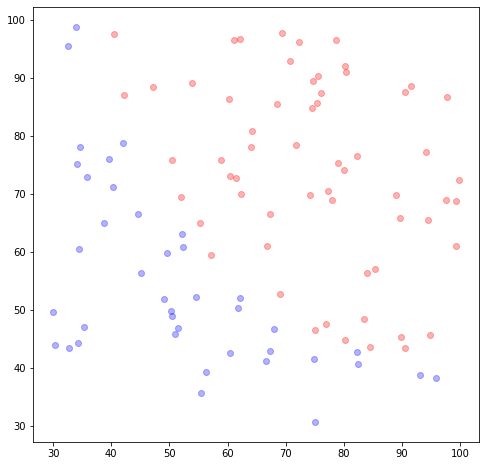

In [5]:
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("/content/drive/My Drive/Colab Notebooks/data.txt", delimiter=',')

x       = data[:, 0]
y       = data[:, 1]
label   = data[:, 2]

x_label0    = x[label == 0]
x_label1    = x[label == 1]

y_label0    = y[label == 0]
y_label1    = y[label == 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.show()

In [213]:
import math

E = []
T0 = []
T1 = []
T2 = []

# preprocessing of h
t = [-25.0, 0.5, 0.0] 
#lr = 0.005, g < 1e-3
lr = 0.004

# use def
#for i in range(0, 100): 
for i in range(0, 125):

    z = t[0] + t[1] * x + t[2] * y
    h = 1.0 / (1.0 + math.e ** -z)
    e = h - label
    g = e.mean()

    E.append((-label * np.log(h) - (1-label) * np.log(1-h)).mean())
    T0.append(t[0])
    T1.append(t[1])
    T2.append(t[2])

    #print(g, E[i])
    
    t[0] -= lr * g
    t[1] -= lr * (e * x).mean()
    t[2] -= lr * (e * y).mean()

print(t, g, E[i-1])

[-25.001560901432544, 0.2049537217999877, 0.2001787994408193] 4.7903903454161735e-05 0.20350151851123244


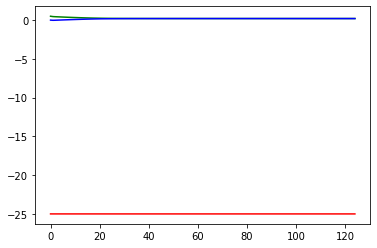

In [214]:
plt.plot(T0, c='red')
plt.plot(T1, c='green')
plt.plot(T2, c='blue')
plt.show()

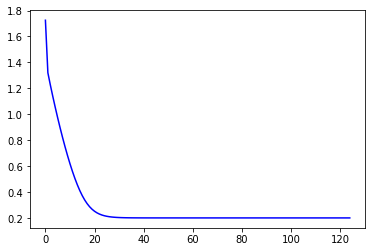

In [215]:
plt.plot(E, c='blue')
plt.show()

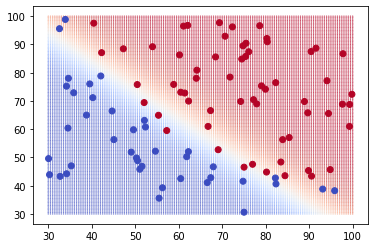

In [227]:
X = np.arange(30,100.5,0.5)
Y = np.arange(30,100.5,0.5)

X_cmap = []
for m in range (0, 141*141):
    X_cmap.append(X[int(m/141)])

Y_cmap = []
for n in range (0, 141*141):
    Y_cmap.append(Y[n%141])

C = []
for l in range (0, 141*141):
    zC = t[0] + t[1] * X_cmap[l] + t[2] * Y_cmap[l]
    C.append(1.0 / (1.0 + math.e ** -zC))

plt.scatter(X_cmap, Y_cmap, c=C, cmap='coolwarm', s = 0.1)
plt.scatter(x, y, c=label, cmap='coolwarm')

plt.show()